### Review Machine Learning

> * Tujuan dari machine learning adalah untuk melakukan optimasi pada objective function.
> * Terdapat dua kategori dari optimasi, yaitu:
    1. First order (first derivative/gradient)
    2. Seconda  order (second derivatice in the scalar case)
> * Keduanya melakukan compute loss function dengan meminimalisasi perbedaan antara `real label` terhadap `predicted label` value melalu convex optimization (contoh : gradient descent, newton's method)

###### How about unlabeled data?

<img src="https://s-media-cache-ak0.pinimg.com/736x/8b/23/3e/8b233e2d7f26b00d0c594894917a127b--supervised-learning-variables.jpg" width=500/>

<img src="https://image.slidesharecdn.com/summit2014presentationfinal-141031070327-conversion-gate02/95/set-your-content-straight-28-638.jpg?cb=1414739431" width=500/>

> Clustering - Merupakan type unsupervised learning yang terkenal. Dalam clustering algorithm akan mencoba untuk mencari `natural groupings` dalam data. Points data yang serupa (menurut beberapa kesamaan) akan dianggap dalam satu kelompok yang sama, dan kelompok ini yang dinamakan sebagai clusters.

# K-Mean Clustering

K-mean clustering adalah salah satu "unsupervised machine learning algorithms" yang paling sederhana dan populer. Tujuan dari algoritma ini adalah uuk menemukan group dalam data, dengan jumlah group yang diwakili oleh variable ```K```. Variable ```K``` sendiri adalah jumlah cluster yang diinginkan.

### # Proses K-Mean Clustering
![kmean](http://konukoii.com/blog/wp-content/uploads/2017/01/RunyanKmeans.gif "Kmean process")

Untuk memproses data algoritma K-means Clustering, data dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang untuk mengoptimalkan posisi centroid.

```
    input: K, set of points (x1 ... xn)
    place centroids c1 .. ck at random locations
    repeat until convergence:
        for each point xi:
            * find nearest centroid cj
            * assign the point ci to cluster j
        for each cluster j = 1 ... k:
            * new centroid cj= mean of all points xi assigned to cluster j in previous step
    stop when non of the cluster assignments change
```
Proses akan berhenti mengoptimalkan cluster ketika:
1. Centroid telah stabil-tidak ada perubahan dalam nilai-nilai mereka karena pengelompokan telah berhasil.
2. Jumlah iterasi yang ditentukan telah tercapai.

#### ## Menentukan K terbaik

1. Jika kita telaah mengetahui kelas yang diinginkan, maka itu lah yang akan menjadi K.
2. Jika tidak maka `Elbow` method menjadi salah satu jalan yang popular digunakan.

<img src="https://cdn-images-1.medium.com/max/1600/0*jWe7Ns_ubBpOaemM.png" width=500/>

Elbow method mencari nilai K terbaik dengan cara mecoba K-means clustering terhadap dataset dengan range value dari K (Kita ambil contoh, K mulai dari 1 sampai 10), dan untuk setiap value dari K dihitung jumlah dari hasil akar error (SSE), yaitu:

```
   var sse = {};
   for 9var k = 1; k <= maxK; ++k) {
       sse[k] = 0;
       clusters = kmeans(dataser, k);
       clusters.forEach(function(cluster) {
           mean = clusterMean(cluster);
           cluster.forEach(function(datapoint) {
               sse[k] += Math.pow(datapoint - mean, 2);
           });
        });
   }
```
Setelah SSE dari setiap K value, lakukan line plot. Jika line chart yang dihasilkan berbentuk menyerupai lengan, maka bagian "elbow" dari lengan merupakan best value untuk dijadikan `K`.

#### ## Bagaimana jarak antara centroids dan data points diukur?

Jawabannya adalah `Euclidean Distance`. Karena K-Means meminimalkan varians dalam cluster dan jika kita lihat definisi dari varians, itu identik dengan jumlah jarak euclidean kudrat dari pusat.

### # Kapan K-Means Dapat digunakan?

- Data yang dimiliki adalah numerik. 
- Jika label dari data yang dimiliki tidak diketahui.
- Berguna ketika diketahui berapa banyak clusters yang sebenarnya muncul pada space yang diinginkan.
- Ketika data yang dimiliki meruaak `multivariate data`. dapat diterakan pada data 1 dimensi namun tidak akan terlalu cerdas lagi.

### # Hasil dari K-Mean Clustering
1. Centroid dari cluster K, yang dapat digunakan untuk memberi label data baru.
2. Label untuk data pelatihan (setiap titik data ditugaskan satu cluster)

<img src="https://i.stack.imgur.com/cIDB3.png"/>

###### <> Load Hough Circle Transform

In [1]:
%run ./aiko_circle_detection.ipynb

HT is Ready!


In [2]:
import time

try:
    ht_result = np.genfromtxt("Result/Result.csv", delimiter=",", skip_header=1)
except:
    start = time.time()
    execute_ht()
    ht_result = np.genfromtxt("Result/Result.csv", delimiter=",", skip_header=1)
    end = time.time()
    print('Time spent for Hough Circle Transform =>', end - start, 's')
    
X = ht_result[:,1:3]

### Import Useful Library

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import MinMaxScaler

## 1. K-Means Clustering Without E-M

<IPython.core.display.Javascript object>


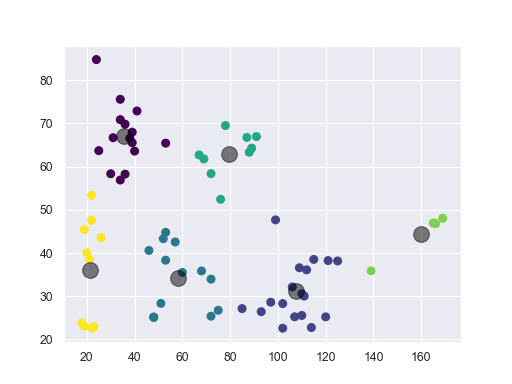

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, max_iter=1000, algorithm='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
# Save K-Means Clustering 1 result to csv
df = pd.read_csv('Result/Result.csv')
df['Wood Class'] = y_kmeans
df.to_excel('Result/Kmean1.xlsx', index = False)

## 2. K-Means Clustering With E-M

Expectation-maximation(E-M) Merupakan algoritma yang powerful dalam berbagai konteks dalam data science. K-Mean adalah algoritma yang sangat sederhana dan mudah dipahami, dan akan mudah untuk diaplikasikan. Pendekatan Expectation-Maximization (E-M) akan terdiri dari beberapa procedure sebagai berikut ini:
```
    1. Menebak beberapa cluster centers
    2. Repeat until converged
        * E-Step : Menetapkan points terhadap cluster center terdekat
        * M-Step : Mengatur pusat cluster ke mean
```
> "E-Step" atau "Expectation Step" diberinama demikian karena didalamna melibatkan pembaruan "expectation" yang dimiliki oleh masing-masig cluster. 

> "M-Step" atau "Maximization Step" diberi nama demikian karena melibatkan "maximizing" bebrapa fitness function yang menentukan lokasi cluster centers. Maximization dicapai denan mengambil rata-rata sederhana dari setiap data di sekitar cluster.

<IPython.core.display.Javascript object>


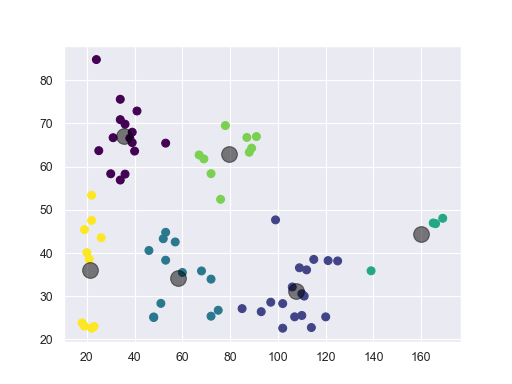

In [6]:
def find_clusters(X, n_clusters, rseed=50):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 6)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, alpha=0.5);

In [7]:
# Save K-Means result to csv
df2 = pd.read_csv('Result/Result.csv')
df2['Wood Class'] = labels
df2.to_excel('Result/Kmean2.xlsx', index = False)

### > K-Means Clustering : E-M (Step by Step Plot)

In [8]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

rng = np.random.RandomState(50)
i = rng.permutation(X.shape[0])[:6]
centers = X[i]

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(6), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

<IPython.core.display.Javascript object>


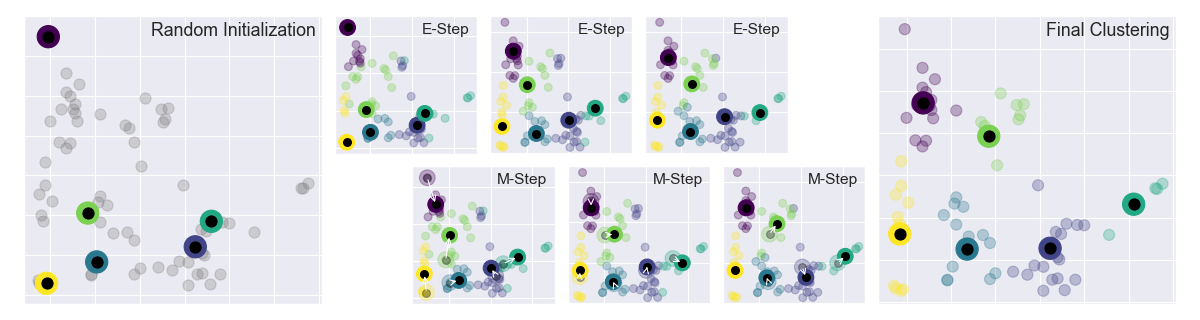

In [9]:
fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(6)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(6):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

fig.savefig('Result/expectation-maximization-result.png')